

# Carga de paquetes

In [ ]:
import numpy as np
from scipy import stats
import pylab
from matplotlib import pyplot
pyplot.rcParams['figure.figsize']=[10,8]
import pandas_datareader as pdr

In [ ]:
!pip install git+https://github.com/pydata/pandas-datareader.git
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
!pip install dtaidistance[all]
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 4.1 MB/s 


In [ ]:
from scipy.spatial import distance
import datetime
import pickle
import sys
from itertools import combinations
import random

# Función y demás


In [ ]:
def funcionfinal(a,b):
  r=np.log(empresa[a])
  s=np.log(empresa[b])
  caminodeformado = dtw.warping_path(r,s)
  r_def=[r[i] for i,_ in caminodeformado]
  s_def=[s[i] for _,i in caminodeformado]
  corrdeformada=np.corrcoef(r_def,s_def)[1,0]
  distancia = dtw.distance(r,s)
  distanciacorr = distance.correlation(r,s)
  return corrdeformada, distancia, distanciacorr

In [ ]:
from pandas_datareader import data
import pandas as pd
linksp500="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tablasp=pd.read_html(linksp500)
sp500 = tablasp[0]
sp500.to_csv("tablasp500.csv")
sp500.to_csv("inicialessp500.csv", columns =["Symbol"])

In [ ]:
#import pandas as pd
#from pandas_datareader import data

#empresa={}; #empresa junto a su precio
#for i in range(501):
#  try:
#    accion=sp500["Symbol"][i]
#    empresa[accion]=pdr.get_data_yahoo(accion,start=datetime.datetime(2021, 1, 1),end=datetime.datetime(2022, 1,1))['Adj Close'].values
#  except:
#    print('Error',accion)

In [ ]:
#import pickle #GUARDAR
#with open('listaempresa.pkl', 'wb') as f:
#    pickle.dump(empresa, f)

In [ ]:
import pickle
with open('listaempresa.pkl', 'rb') as f: #CARGAR
    empresa = pickle.load(f)

In [ ]:
#from itertools import combinations
lista=[]
for i in range(502):
  lista.append(sp500["Symbol"][i]) #guarda una lista de los símbolos de las empresas
combinaciones = list(combinations(lista, 2)) #todas las posibles parejas sin repetir

In [ ]:
random.shuffle(combinaciones)

In [ ]:
tablafinal=[]
for i in range(len(combinaciones)):
  try:
    tablafinal.append([combinaciones[i],funcionfinal(combinaciones[i][0],combinaciones[i][1])])
  except:
    print('Error',combinaciones[i][0],combinaciones[i][1])

In [ ]:
import pickle #GUARDAR
with open('listatotal.pkl', 'wb') as f:
    pickle.dump(tablafinal, f)

In [ ]:
import pickle
with open('tablafinaltotal.pkl', 'rb') as f: #CARGAR
    tablafinal = pickle.load(f)

In [ ]:
valoresdtwcorr=[]
valoresdtwdist=[]
valoresdistcorr=[]
for i in range(len(tablafinal)):
  valoresdtwcorr.append(tablafinal[i][1][0])
  valoresdtwdist.append(tablafinal[i][1][1])
  valoresdistcorr.append(tablafinal[i][1][2])

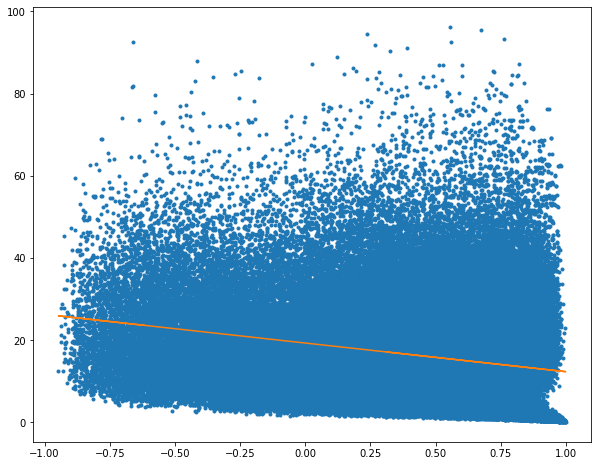

In [ ]:
import math
from scipy.stats import linregress
rr = linregress(valoresdtwcorr, valoresdtwdist) #recta de regresión que devolvería mas cosas aparte de la pendiente
pylab.plot(valoresdtwcorr, valoresdtwdist,".")
pylab.plot(valoresdtwcorr, [rr.slope*x+rr.intercept for x in valoresdtwcorr])

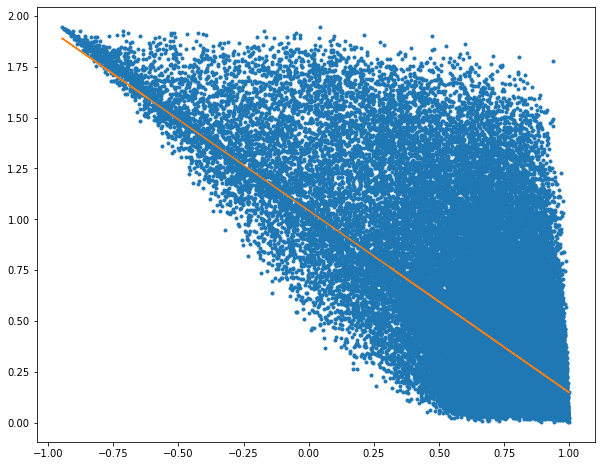

In [ ]:
import math
from scipy.stats import linregress
rr = linregress(valoresdtwcorr, valoresdistcorr) #recta de regresión que devolvería mas cosas aparte de la pendiente
pylab.plot(valoresdtwcorr, valoresdistcorr,".")
pylab.plot(valoresdtwcorr, [rr.slope*x+rr.intercept for x in valoresdtwcorr])

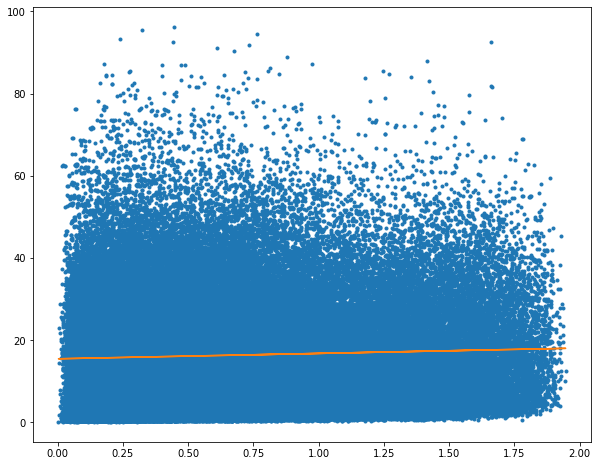

In [ ]:
import math
from scipy.stats import linregress
rr = linregress(valoresdistcorr, valoresdtwdist) #recta de regresión que devolvería mas cosas aparte de la pendiente
pylab.plot(valoresdistcorr, valoresdtwdist,".")
pylab.plot(valoresdistcorr, [rr.slope*x+rr.intercept for x in valoresdistcorr])

In [ ]:
tablafinal[-2]

[('YUM', 'ZBH'), (0.005812580452652469, 4.084601592749408, 1.587189155578241)]